# Credit Fraud

With more cashless options available today, managing online payments have been increasingly important. The detection of fraud is a key task for any banks and with machine learning, that task can be made simple and accurate. Every bank will have a fraud department that will attempt to identify any fradulent transactions and stop the transaction while notifying the customer. 

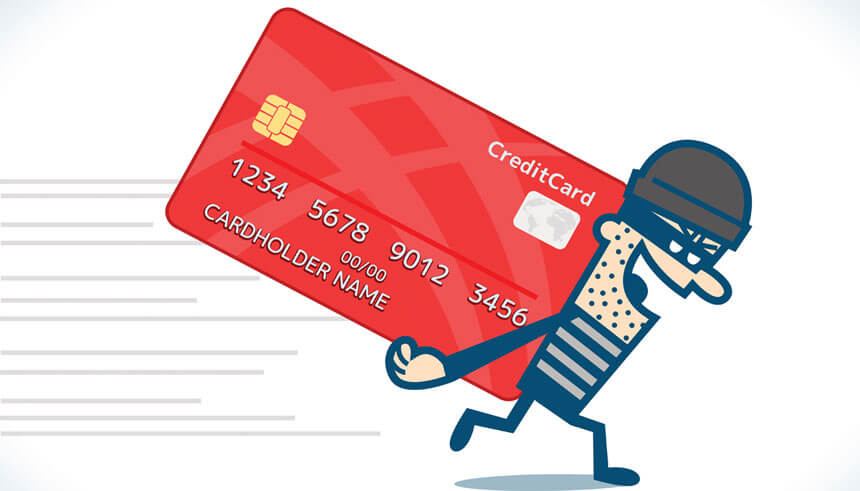

https://www.kaggle.com/mlg-ulb/creditcardfraud

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [27]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<AxesSubplot:xlabel='Class', ylabel='count'>

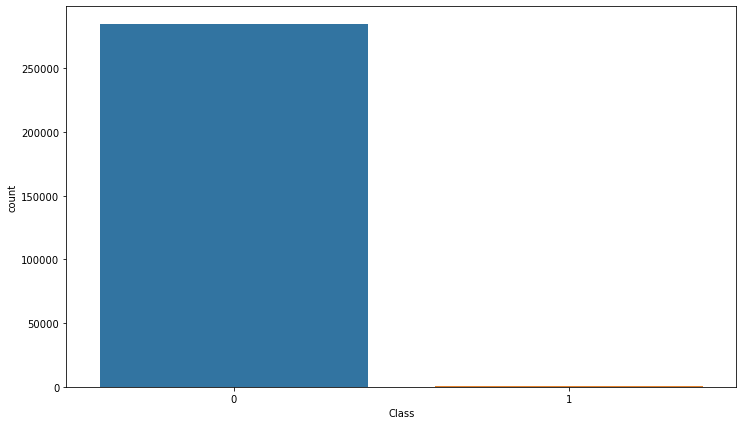

In [28]:
plt.figure(figsize=(12,7))
sns.countplot(data=data, x= 'Class')

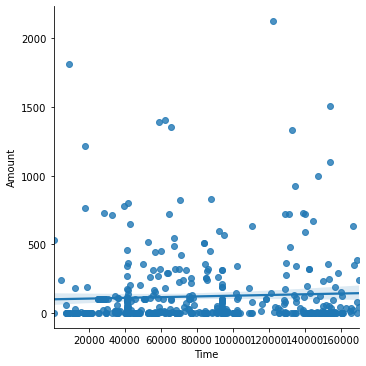

In [29]:
# fig, ax =plt.subplots(1,2)

data_1 = data[data['Class']==1]
sns.lmplot(data=data_1,x='Time',y='Amount')
# sns.scatterplot(data=data,x='Time',y='Amount',ax=ax[1])

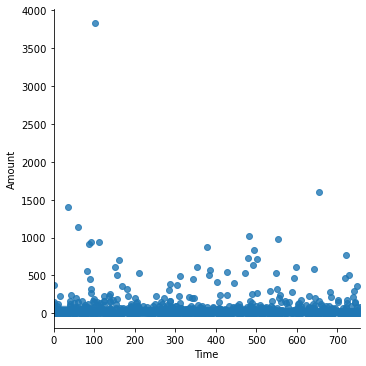

In [30]:
sns.lmplot(data=data[:1000],x='Time',y='Amount')

C:\Users\kchun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount', ylabel='Density'>

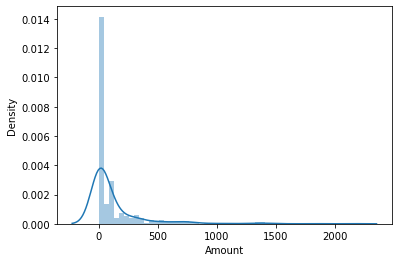

In [31]:
sns.distplot(a = data_1['Amount'])

C:\Users\kchun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


KeyboardInterrupt: 

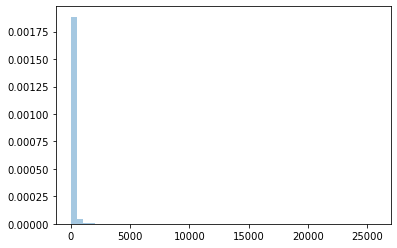

In [32]:
sns.distplot(a = data['Amount'])

In [ ]:
import missingno as msno
msno.bar(data, figsize=(15,7),color='steelblue')
plt.show()
data.isnull().sum()

In [ ]:
data.duplicated().value_counts()

In [4]:
data.drop_duplicates(keep=False,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282953 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    282953 non-null  float64
 1   V1      282953 non-null  float64
 2   V2      282953 non-null  float64
 3   V3      282953 non-null  float64
 4   V4      282953 non-null  float64
 5   V5      282953 non-null  float64
 6   V6      282953 non-null  float64
 7   V7      282953 non-null  float64
 8   V8      282953 non-null  float64
 9   V9      282953 non-null  float64
 10  V10     282953 non-null  float64
 11  V11     282953 non-null  float64
 12  V12     282953 non-null  float64
 13  V13     282953 non-null  float64
 14  V14     282953 non-null  float64
 15  V15     282953 non-null  float64
 16  V16     282953 non-null  float64
 17  V17     282953 non-null  float64
 18  V18     282953 non-null  float64
 19  V19     282953 non-null  float64
 20  V20     282953 non-null  float64
 21  V21     28

## Model Building - Random Forest

In [5]:
from sklearn.model_selection import train_test_split
X = data.drop('Class',axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=97,stratify=y)

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500,random_state=97)
rfc.fit(X_train,y_train)

### Model Predictions and Evaluations

In [ ]:
rfpred = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
scoring = roc_auc_score(y_test,rfpred)*100
print('The roc_auc for this model is '+str(round(scoring,ndigits=2))+'%')

From this approach, the model took quite a long time of 12min to fit the training data set which is quite long for random forest and no gridsearch was used. With this result, I decide to change my approach on training models.

I will now use PCA to further reduce the dimensions of the features to 2 so that our model fitting will be faster. Given that PCA was already done to hide the sensitive information, the number of dimensions given is still too many. I will then use oversampling to combat the class imbalance. I will use SMOTE which works by creating synthetic points from the minority class. SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points. With this in mind, all the more important PCA should be used as we are almost doubling the size of our dataset with oversampling.

###### In Summary: Scale > PCA > SMOTE > Models >auc_roc comparison

In [ ]:

# Train test split, scale training and fit to both test and training, PCA the training set, SMOTE the training set and use the models
# when testing remmeber to PCA the test set too

### Scaling Data

Only scaling required for time and amount as v1-v28 columns have already been through PCA and they appear to have a standard distribution from the describe cell above.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
X_train[['time','amount']] = scaler.fit_transform(X_train[['Time','Amount']])
X_train.drop(['Time','Amount'],axis=1,inplace=True)
X_train.head()

C:\Users\kchun\anaconda3\lib\site-packages\pandas\core\indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
<ipython-input-7-edc21ba66d34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['time','amount']] = scaler.fit_transform(X_train[['Time','Amount']])
C:\Users\kchun\anaconda3\lib\site-packages\pandas\core\frame.py:3072: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,time,amount
157231,0.134458,0.938668,0.607946,-0.429366,0.717135,-0.945937,1.152150,-0.520039,1.283300,-0.597670,...,-0.449233,-0.651963,0.040094,-0.062357,-0.531119,0.074103,0.064638,-0.131181,0.313599,-0.334415
51857,-2.945453,2.762252,-1.184522,-0.486583,-0.797210,0.390805,-1.231602,2.363687,-0.945043,-0.308372,...,-0.088482,-0.652061,0.087204,-1.341101,0.179241,0.174962,-0.150901,-0.058858,-1.046736,-0.307571
29335,1.181140,0.012045,-0.230114,0.480563,-0.262595,-1.031772,0.296139,-0.127868,-0.181777,0.201140,...,0.024366,-0.119476,-0.132118,0.328298,0.554239,0.520277,-0.096858,-0.008734,-1.251688,-0.170638
225312,0.223618,0.768996,-1.345911,-1.076192,1.942128,0.018346,1.237840,-0.156497,-0.538158,-0.188735,...,0.130961,0.375863,-0.441035,-0.631969,0.310543,0.662996,-0.218154,-0.050981,1.039302,-0.344266
212485,-0.401708,1.330328,-0.527363,-0.740388,0.961769,-0.543675,0.862436,0.030536,-0.048999,-0.073830,...,-0.331332,-0.658166,0.109003,0.616607,-0.353793,0.099329,0.442398,0.205224,0.927233,-0.329784


In [8]:
X_test[['time','amount']] = scaler.transform(X_test[['Time','Amount']])
X_test.drop(['Time','Amount'],axis=1,inplace=True)
X_test.head()

C:\Users\kchun\anaconda3\lib\site-packages\pandas\core\indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
<ipython-input-8-22d7f5c2a605>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['time','amount']] = scaler.transform(X_test[['Time','Amount']])
C:\Users\kchun\anaconda3\lib\site-packages\pandas\core\frame.py:3072: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,time,amount
8947,1.203972,-0.050744,0.685868,0.111088,-0.580873,-0.508674,-0.376760,-0.091840,1.729603,-0.626068,...,-0.248857,-0.485601,0.125194,0.066715,0.001834,0.894543,-0.087199,0.002358,-1.738446,-0.259454
132434,1.190539,-0.635601,0.483324,0.010465,-0.974681,-0.146851,-0.569827,0.137362,-0.859406,0.817072,...,-0.464753,-0.888368,0.128098,0.174264,0.141862,0.262030,-0.005072,0.008951,-0.313177,-0.190458
96397,-0.329875,0.861798,1.798172,0.625118,0.761882,-0.374504,-0.361625,-0.811521,-1.048522,-0.093410,...,0.663959,-0.753037,-1.200322,0.189334,1.081571,0.872160,0.028712,0.152577,-0.612928,-0.347249
282201,2.040114,-0.024724,-1.057893,0.407148,-0.048930,-1.107682,0.233318,-0.355955,0.419404,0.038227,...,-0.269932,-0.614491,0.331105,0.008802,-0.289330,0.197644,-0.063749,-0.057545,1.598007,-0.311966
220845,1.953349,0.649021,-0.773028,3.733690,0.401661,-0.529737,0.325374,-0.225032,-1.102374,1.556156,...,0.225311,0.658035,0.067528,0.029925,0.118953,0.130614,-0.046949,-0.052709,0.999706,-0.338340


### PCA 

In [9]:
%%time
from sklearn.decomposition import PCA
pca = PCA(n_components=9,random_state=97)
pca.fit(X_train)
X_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_pca.shape

Wall time: 509 ms


(198067, 9)

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [10]:
pca.explained_variance_ratio_*100

array([12.03439579,  9.78217157,  7.98216009,  6.63645923,  6.13358193,
        5.56020958,  4.86484227,  4.21332775,  3.76341218])

In [9]:
print('Total percent of variance captured with 9 PCA components is',round(pca.explained_variance_ratio_.sum()*100,ndigits=2),'%')

Total percent of variance captured with 9 PCA components is 60.97 %


This shows the 9 components can retain 60% of the original variance.

### Oversampling with SMOTE

In [11]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=97)
X_train_res, y_train_res = sm.fit_resample(X_pca,y_train)

from collections import Counter

print("Before {}".format(Counter(y_train)))
print("After {}".format(Counter(y_train_res)))


Before Counter({0: 197745, 1: 322})
After Counter({0: 197745, 1: 197745})


## Model Building - Logistic Regression

In [15]:
%%time
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(random_state=97)
logmodel.fit(X_train_res,y_train_res)

Wall time: 450 ms


LogisticRegression(random_state=97)

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

logpredict = logmodel.predict(X_test_pca)
roc_log = roc_auc_score(y_test,logpredict)
roc_log

0.9147074908526762

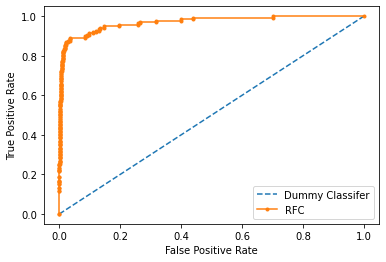

In [17]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = logmodel.predict_proba(X_test_pca)
lr_probs = lr_probs[:, 1]

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy Classifer')
plt.plot(lr_fpr, lr_tpr, marker='.', label='RFC')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,logpredict))
print('\n')
print(classification_report(y_test,logpredict))
print('\n')
print('Accuracy score {:.2f}'.format(accuracy_score(y_test,logpredict)*100))


## Model Building - SVC

Since we have 400,000 rows of data, SVC will take too long to process as the fit time complexity is more than quadratic with the number of samples base on the big O notation. Hence we will use the first 100,000 rows of dataset which is random as the training phase already shuffled them.

In [17]:
%%time
from sklearn.svm import SVC

modelSVC = SVC(random_state=97,verbose=3,probability=True)
modelSVC.fit(X_train_res[:100000],y_train_res[:100000])

[LibSVM]Wall time: 1min 3s


SVC(probability=True, random_state=97, verbose=3)

In [18]:
SVCpredict = modelSVC.predict(X_test_pca)
roc_SVC = roc_auc_score(y_test,SVCpredict)*100
print('The roc_auc score for the SVC model is',round(roc_SVC,ndigits=2),'%')

The roc_auc score for the SVC model is 68.84 %


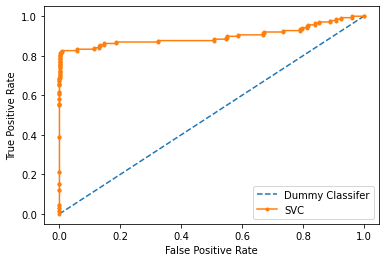

In [21]:
svc_probs = modelSVC.predict_proba(X_test_pca)
svc_probs = svc_probs[:, 1]

svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy Classifer')
plt.plot(svc_fpr, svc_tpr, marker='.', label='SVC')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()


## KNN Model

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [21]:
KNNpred = knn.predict(X_test_pca)
roc_KNN = roc_auc_score(y_test,KNNpred)*100
print('The roc_auc score for the KNN model is',round(roc_KNN,ndigits=2),'%')

The roc_auc score for the KNN model is 89.32 %


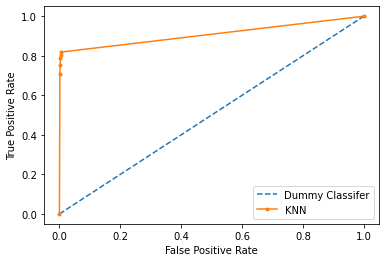

In [18]:
knn_probs = knn.predict_proba(X_test_pca)
knn_probs = knn_probs[:, 1]

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy Classifer')
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()

In [14]:
KNNpred = knn.predict(X_test_pca)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,KNNpred))
print('\n')
print(classification_report(y_test,KNNpred))
print('\n')
print('Accuracy score {:.2f}'.format(accuracy_score(y_test,KNNpred)*100))


[[84447   301]
 [   29   109]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84748
           1       0.27      0.79      0.40       138

    accuracy                           1.00     84886
   macro avg       0.63      0.89      0.70     84886
weighted avg       1.00      1.00      1.00     84886



Accuracy score 99.61


## XGBoost Model

In [26]:
%%time
from xgboost import XGBClassifier

XGmodel = XGBClassifier(random_state=97,use_label_encoder=False)
XGmodel.fit(X_train_res,y_train_res)

[13:14:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=97,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [42]:
XGpred = XGmodel.predict(X_test_pca)
roc_XG = roc_auc_score(y_test,XGpred)*100
print('The roc_auc score for the XG model is',round(roc_XG,ndigits=2),'%')

The roc_auc score for the XG model is 88.22 %


In [34]:
%%time
learn_rate = np.arange(0.1,0.8,0.2)
estimators = np.arange(50,200,50)
XGparams = {'learning_rate':learn_rate,'n_estimators':estimators}
from sklearn.model_selection import GridSearchCV
XGgrid = GridSearchCV(XGmodel,XGparams,verbose=1,scoring='roc_auc',cv=4)
XGgrid.fit(X_train_res,y_train_res)
print('The best estimators are',XGgrid.best_estimator_)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
[13:30:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:30:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:30:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:30:29

[13:35:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:36:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:36:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:36:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [43]:
XGgrid.best_score_

0.9999533878864326

In [45]:
XGgrid_pred = XGgrid.predict(X_test_pca)
roc_XGgrid = roc_auc_score(y_test,XGgrid_pred)*100
print('The roc_auc score for the KNN model is',round(roc_XGgrid,ndigits=2),'%')

The roc_auc score for the KNN model is 87.59 %


In [52]:
print(confusion_matrix(y_test,XGpred))
print('\n')
print(classification_report(y_test,XGpred))
print('\n')
print('Accuracy score',accuracy_score(y_test,XGpred*100))


[[84437   311]
 [   32   106]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84748
           1       0.25      0.77      0.38       138

    accuracy                           1.00     84886
   macro avg       0.63      0.88      0.69     84886
weighted avg       1.00      1.00      1.00     84886



Accuracy score 0.9947105529769338


In [55]:
print(confusion_matrix(y_test,XGgrid_pred))
print('\n')
print(classification_report(y_test,XGgrid_pred))
print('\n')
print('Accuracy score',accuracy_score(y_test,XGgrid_pred)*100)


[[84599   149]
 [   34   104]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84748
           1       0.41      0.75      0.53       138

    accuracy                           1.00     84886
   macro avg       0.71      0.88      0.77     84886
weighted avg       1.00      1.00      1.00     84886



Accuracy score 99.78441674716679


## Random Forest Model

In [56]:
%%time
from sklearn.ensemble import RandomForestClassifier

rfc2 = RandomForestClassifier(n_estimators=500,random_state=97)
rfc2.fit(X_train_res,y_train_res)

Wall time: 11min 30s


RandomForestClassifier(n_estimators=500, random_state=97)

In [58]:
rf2pred = rfc2.predict(X_test_pca)

scoring = roc_auc_score(y_test,rf2pred)*100
print('The roc_auc for this model is '+str(round(scoring,ndigits=2))+'%')

The roc_auc for this model is 83.29%


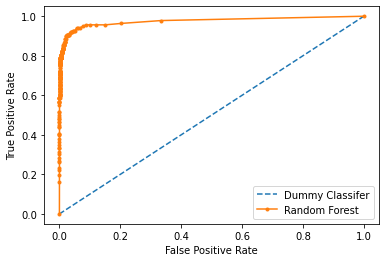

In [59]:
rf2_probs = rfc2.predict_proba(X_test_pca)
rf2_probs = rf2_probs[:, 1]

rf2_fpr, rf2_tpr, _ = roc_curve(y_test, rf2_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy Classifer')
plt.plot(rf2_fpr, rf2_tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()


## Conclusion